In [27]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
# DATA_PATH = ../data/a2/data
DATA_PATH = os.path.join("..", "data", "a2", "data")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

In [29]:
FOLDERS = os.listdir(TRAIN_PATH)
FOLDERS

['bedroom',
 'Coast',
 'Forest',
 'Highway',
 'industrial',
 'Insidecity',
 'kitchen',
 'livingroom',
 'Mountain',
 'Office',
 'OpenCountry',
 'store',
 'Street',
 'Suburb',
 'TallBuilding']

In [30]:
import random

random.seed(42)

rand_imgs = [random.choice(os.listdir(os.path.join(TRAIN_PATH, folder))) for folder in FOLDERS]

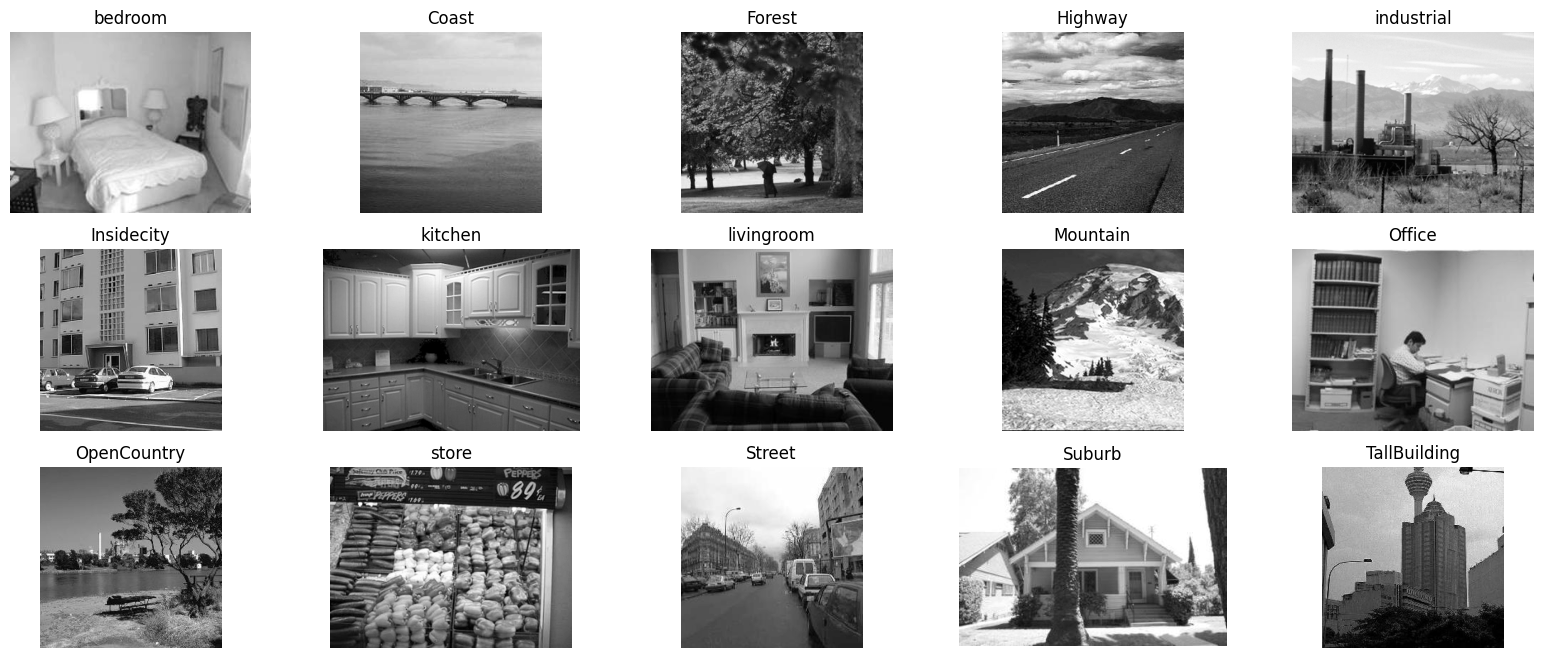

In [31]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    img = Image.open(os.path.join(TRAIN_PATH, FOLDERS[i], rand_imgs[i]))
    ax.imshow(img, cmap="gray")
    ax.set_title(FOLDERS[i])
    ax.axis("off")

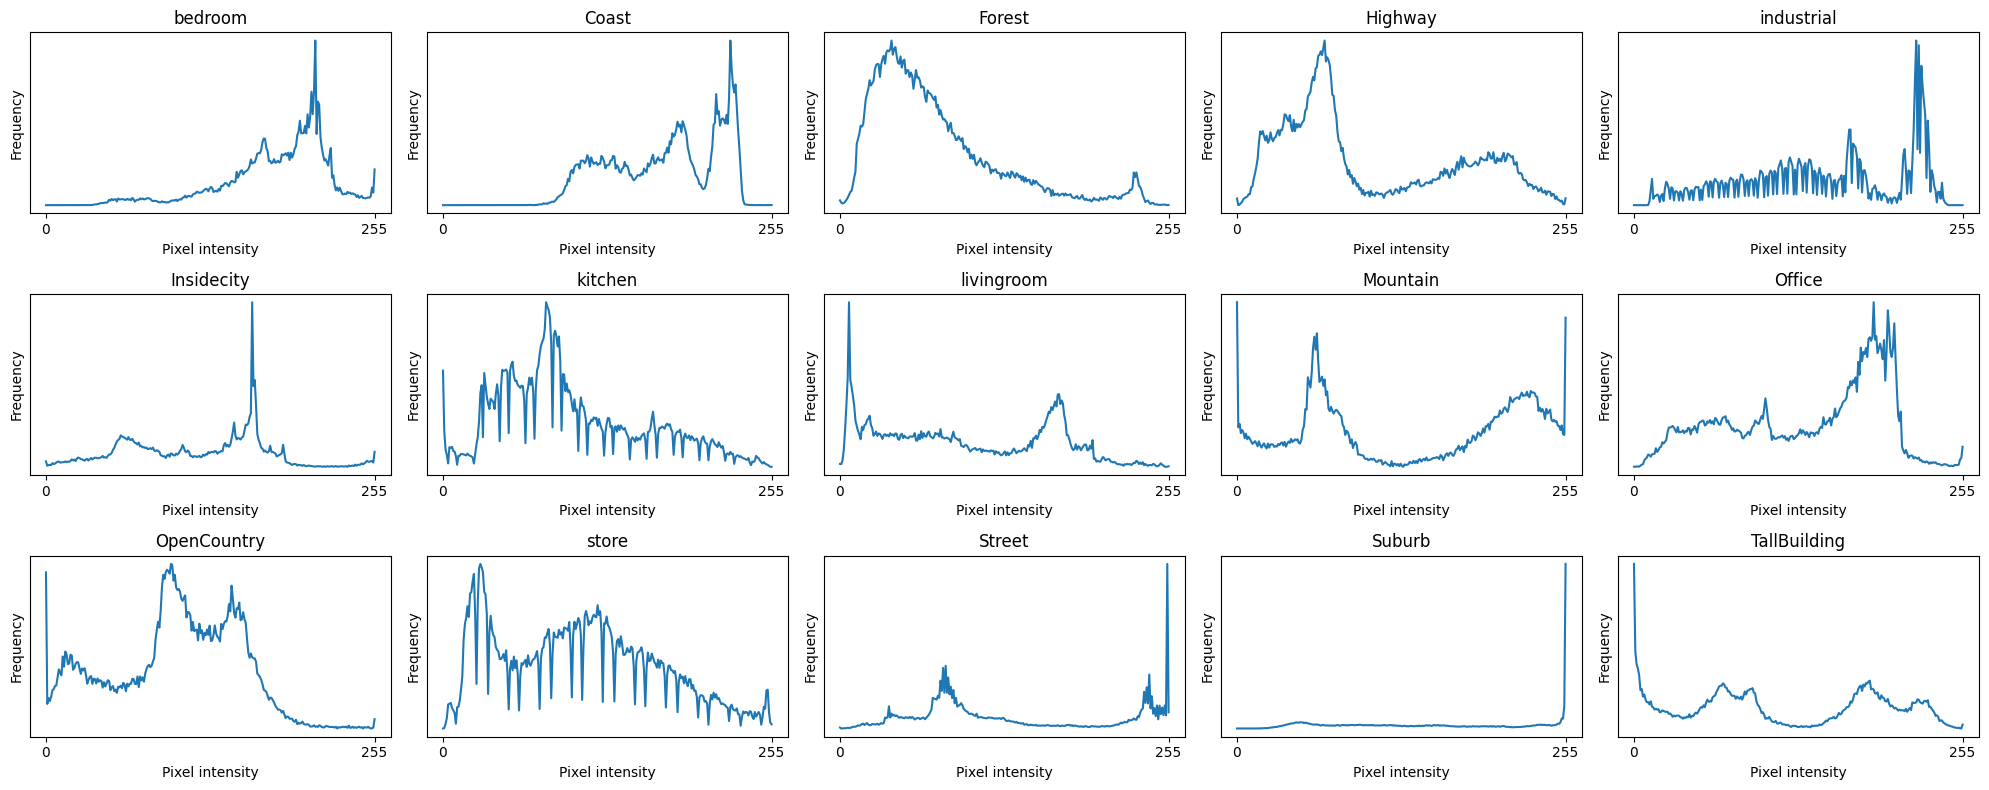

In [32]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    img = Image.open(os.path.join(TRAIN_PATH, FOLDERS[i], rand_imgs[i]))
    ax.plot(img.histogram())
    ax.set_title(FOLDERS[i])
    ax.set_xticks([0, 255])
    ax.set_yticks([])
    ax.set_xlabel("Pixel intensity")
    ax.set_ylabel("Frequency")
plt.tight_layout()

In [33]:
from skimage.feature import hog

def get_hog_features(img):
    return hog(
        img,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm="L2-Hys",
        visualize=False,
        transform_sqrt=True,
        feature_vector=True
    )

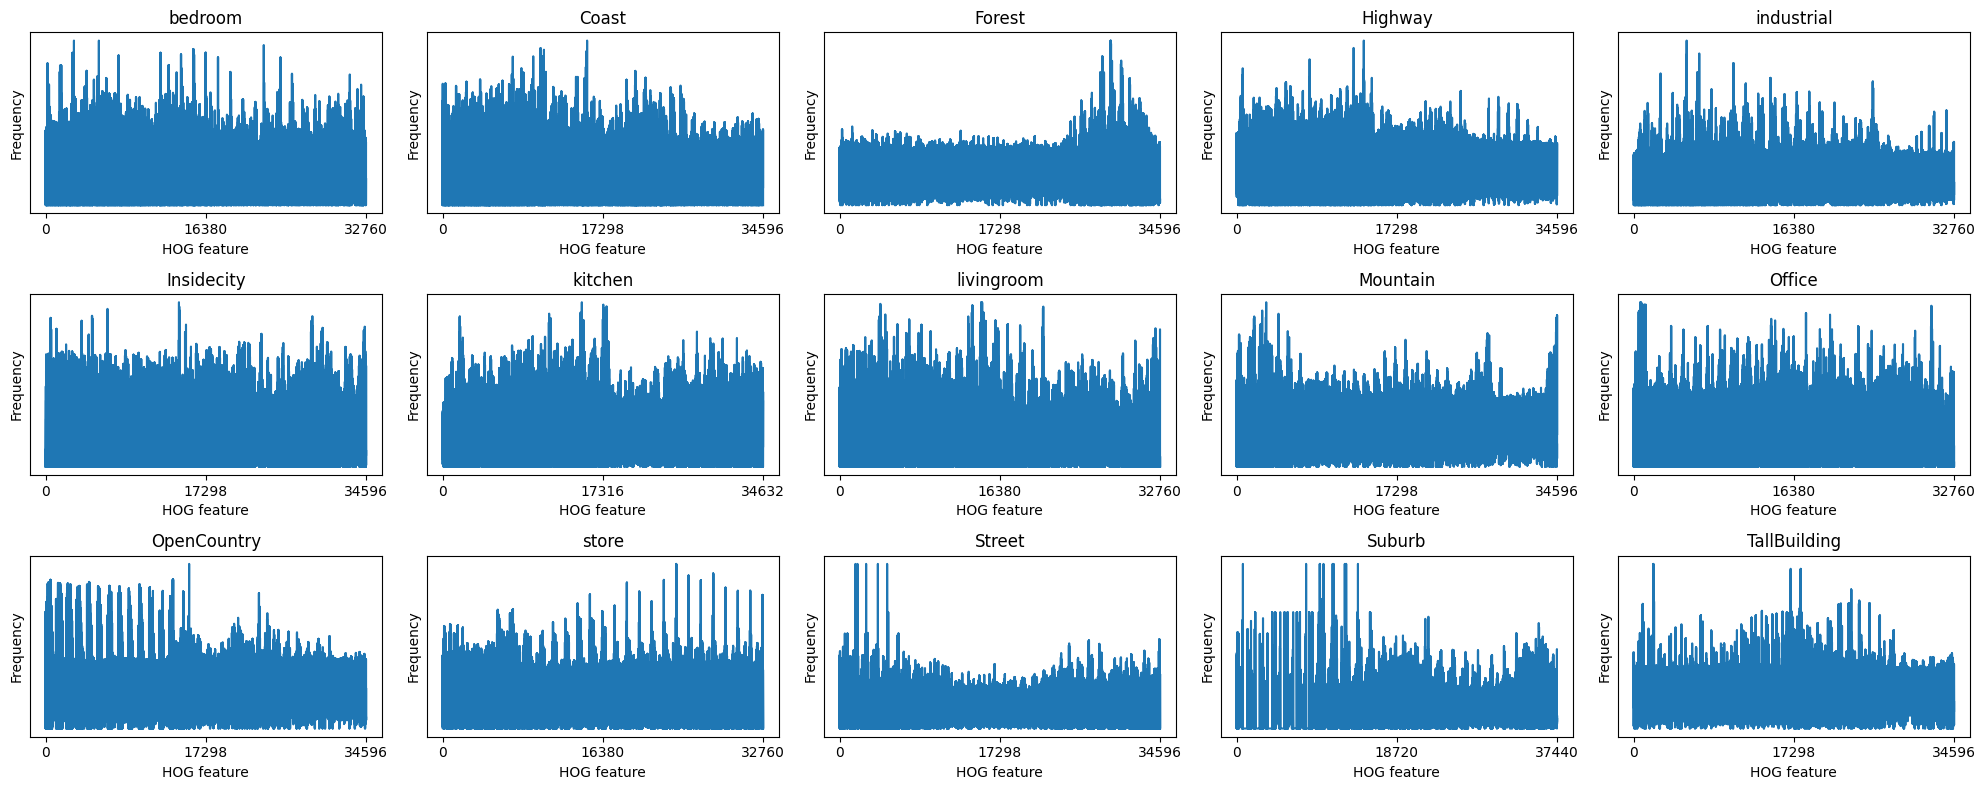

In [34]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    img = Image.open(os.path.join(TRAIN_PATH, FOLDERS[i], rand_imgs[i]))
    hog_features = get_hog_features(img)
    ax.plot(hog_features)
    ax.set_title(FOLDERS[i])
    ax.set_xticks([0, len(hog_features) // 2, len(hog_features)])
    ax.set_yticks([])
    ax.set_xlabel("HOG feature")
    ax.set_ylabel("Frequency")
plt.tight_layout()

In [35]:
DATASET_METADA = {}

for folder in FOLDERS:
    folder_data = []
    for img in os.listdir(os.path.join(TRAIN_PATH, folder)):
        img_name = img
        img = Image.open(os.path.join(TRAIN_PATH, folder, img))
        img_size = img.size
        img = img.resize((64, 64))  # resize to 64x64 to speed up
        img_format = img.format
        img_mode = img.mode
        img_hist = img.histogram()
        img_hog = get_hog_features(img)
        folder_data.append(
            {
                "img_path": img_name,
                "img_size_x": img_size[0],
                "img_size_y": img_size[1],
                "img_format": img_format,
                "img_mode": img_mode,
                "img_hist": img_hist,
                "img_hog": img_hog,
            }
        )
    DATASET_METADA[folder] = folder_data

In [36]:
dfs = []
for folder in FOLDERS:
    df = pd.DataFrame(DATASET_METADA[folder])
    df["label"] = folder
    dfs.append(df)

df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   img_path    1500 non-null   object
 1   img_size_x  1500 non-null   int64 
 2   img_size_y  1500 non-null   int64 
 3   img_format  0 non-null      object
 4   img_mode    1500 non-null   object
 5   img_hist    1500 non-null   object
 6   img_hog     1500 non-null   object
 7   label       1500 non-null   object
dtypes: int64(2), object(6)
memory usage: 93.9+ KB


,img_path,img_size_x,img_size_y,img_format,img_mode,img_hist,img_hog,label
0,image_0001.jpg,267,200,None,L,"[4, 0, 3, 1, 5, 3, 1, 7, 4, 9, 4, 8, 11, 6, 9,...","[0.27585492437287, 0.007683799781391131, 0.004...",bedroom
1,image_0002.jpg,257,200,None,L,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 1, 2, 3, 2, ...","[0.340954320228797, 0.05813947903327981, 0.003...",bedroom
2,image_0005.jpg,246,200,None,L,"[12, 10, 13, 4, 22, 28, 17, 16, 15, 15, 11, 5,...","[0.0478401054820799, 0.015324511549754692, 0.0...",bedroom
3,image_0009.jpg,267,200,None,L,"[4, 1, 3, 0, 3, 3, 7, 5, 6, 8, 7, 7, 5, 8, 10,...","[0.09969308121548436, 0.09751382055239627, 0.1...",bedroom
4,image_0010.jpg,220,286,None,L,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 1, 3, 5, 3, 6, ...","[0.18694318718580163, 0.1547574569076414, 0.01...",bedroom


In [37]:
df.describe()

,img_size_x,img_size_y
count,1500.000000,1500.000000
mean,275.918000,242.810000
std,33.109446,23.357917
min,203.000000,200.000000
25%,256.000000,220.000000
50%,256.000000,256.000000
75%,293.000000,256.000000
max,411.000000,411.000000


In [38]:
# Create a dataframe with values of the img_hist column
hist_df = pd.DataFrame(df["img_hist"].values.tolist())
hist_df.columns = [f"bin_{i}" for i in range(hist_df.shape[1])]
hist_df["label"] = df["label"]
hist_df.info()
hist_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 257 entries, bin_0 to label
dtypes: int64(256), object(1)
memory usage: 2.9+ MB


,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_247,bin_248,bin_249,bin_250,bin_251,bin_252,bin_253,bin_254,bin_255,label
0,4,0,3,1,5,3,1,7,4,9,...,6,8,12,9,8,363,22,16,44,bedroom
1,0,0,0,0,0,0,0,0,0,4,...,14,10,9,6,6,5,2,1,2,bedroom
2,12,10,13,4,22,28,17,16,15,15,...,7,6,5,7,4,5,7,9,43,bedroom
3,4,1,3,0,3,3,7,5,6,8,...,2,7,6,5,3,5,4,7,39,bedroom
4,0,0,0,0,0,0,0,0,2,5,...,14,6,2,8,7,5,5,4,3,bedroom


In [39]:
hist_df.describe()

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_246,bin_247,bin_248,bin_249,bin_250,bin_251,bin_252,bin_253,bin_254,bin_255
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2.406667,2.385333,3.719333,3.582667,5.179333,5.300667,5.551333,6.232667,6.382000,7.674000,...,5.760000,7.240667,7.364667,5.632667,7.542667,5.922667,6.297333,6.130667,17.080667,26.774000
std,14.541008,13.133158,27.005878,14.657275,32.665964,19.562414,15.967592,18.106825,14.663586,20.948133,...,17.066084,43.805822,41.471351,18.438919,49.365421,24.567520,25.010970,18.530007,68.249040,103.981455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,9.000000
max,403.000000,260.000000,669.000000,229.000000,1035.000000,392.000000,226.000000,358.000000,200.000000,346.000000,...,322.000000,1228.000000,1090.000000,293.000000,1363.000000,703.000000,632.000000,350.000000,849.000000,1353.000000


In [40]:
df_mean = hist_df.groupby("label").mean()
df_mean

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_246,bin_247,bin_248,bin_249,bin_250,bin_251,bin_252,bin_253,bin_254,bin_255
label,,,,,,,,,,,,,,,,,,,,,
Coast,0.58,0.69,2.90,4.23,20.38,10.33,9.41,10.79,8.02,10.69,...,4.03,11.56,5.29,4.21,3.52,3.60,3.05,2.47,2.96,5.85
Forest,1.97,2.50,10.46,6.64,6.26,9.77,7.63,6.83,7.39,8.68,...,3.47,2.65,3.69,2.86,4.70,3.01,2.26,3.48,3.75,8.11
Highway,0.81,0.33,0.30,0.50,0.48,0.54,0.62,0.71,0.93,1.12,...,3.62,3.51,8.23,4.51,2.24,3.63,2.25,2.03,1.40,0.75
Insidecity,4.03,3.25,4.50,4.79,4.17,4.35,5.35,6.44,6.98,7.04,...,3.06,1.96,1.98,1.85,10.65,2.32,1.84,2.28,8.74,8.02
Mountain,1.08,4.18,9.69,5.21,4.92,6.22,9.61,8.33,7.83,10.15,...,3.03,3.08,3.30,3.65,3.67,3.75,4.44,6.24,11.66,41.69
Office,2.90,1.14,2.05,3.05,5.04,7.22,9.19,12.18,13.66,15.51,...,12.88,12.45,3.32,2.33,1.49,1.02,0.68,0.59,0.61,2.79
OpenCountry,1.29,0.82,1.49,2.27,2.81,2.15,3.33,4.11,4.63,4.89,...,6.14,7.74,24.66,6.09,6.48,6.63,4.66,4.92,9.85,17.69
Street,0.33,0.35,0.46,0.91,2.21,3.53,3.52,4.03,3.89,3.96,...,4.67,4.30,5.21,10.17,27.37,15.67,9.79,11.53,130.70,13.06
Suburb,0.50,1.72,2.41,2.88,3.69,4.16,5.25,5.80,6.27,6.87,...,11.61,12.90,13.39,15.17,12.36,17.53,18.90,17.11,36.04,151.96


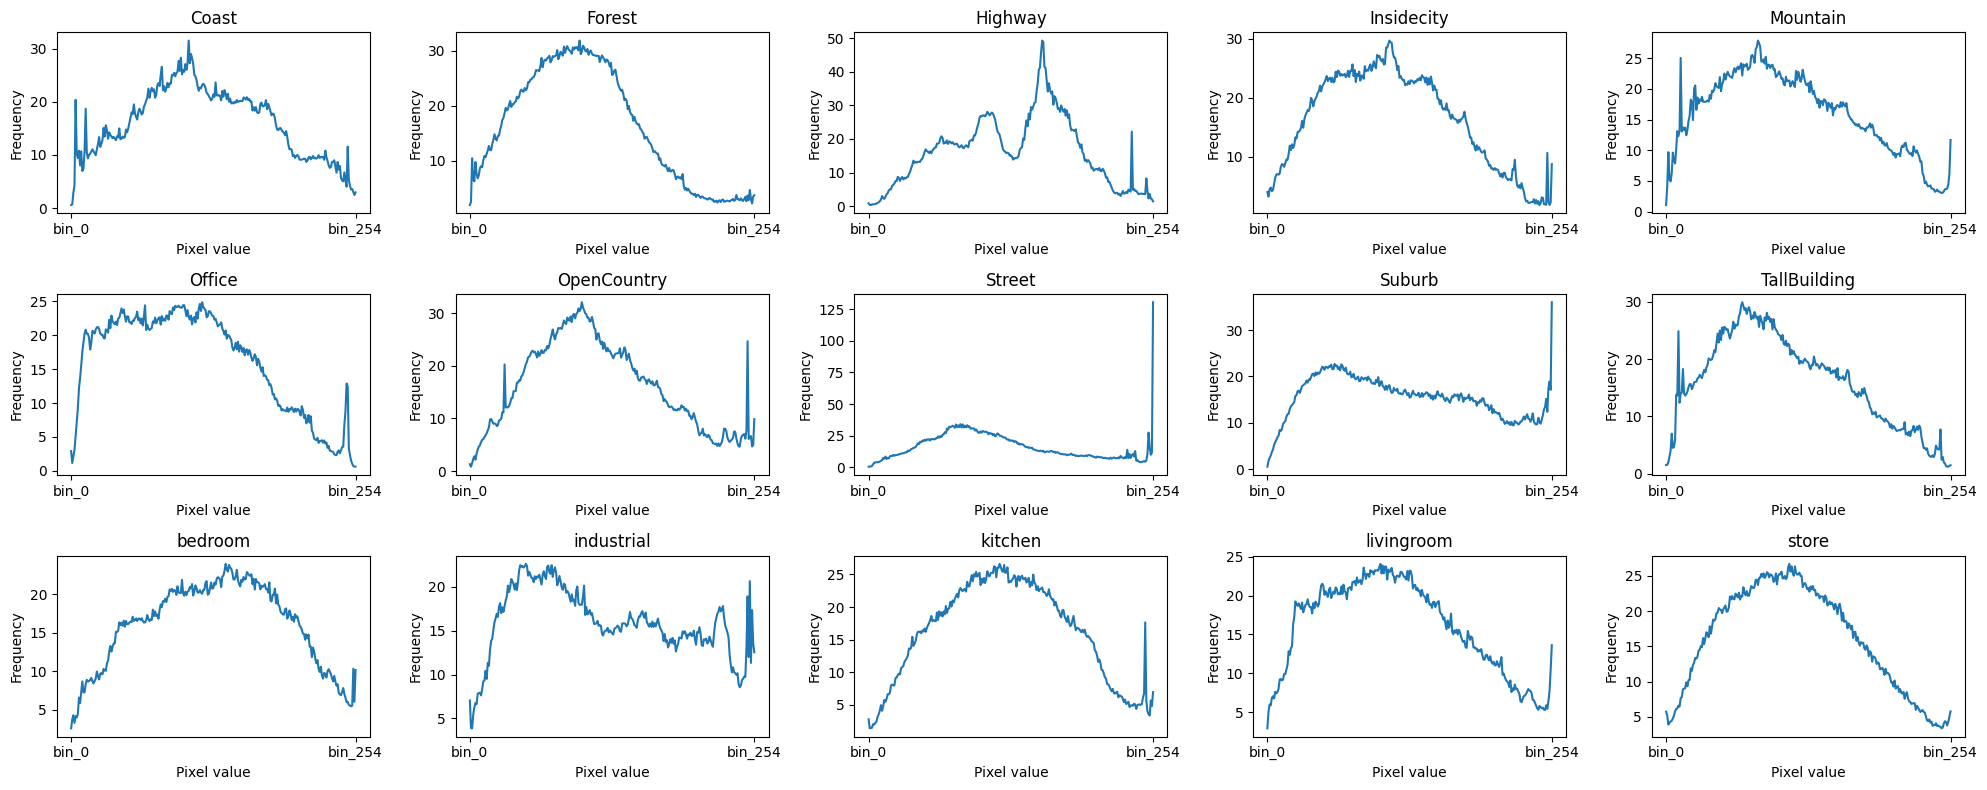

In [41]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    ax.plot(df_mean.iloc[i, :-1])
    ax.set_title(df_mean.index[i])
    ax.set_xticks([0, 254])
    ax.set_xlabel("Pixel value")
    ax.set_ylabel("Frequency")

plt.tight_layout()

In [42]:
# Create a dataframe with values of the img_hist column
hog_df = pd.DataFrame(df["img_hog"].values.tolist())
hog_df.columns = [f"bin_{i}" for i in range(hog_df.shape[1])]
hog_df["label"] = df["label"]
hog_df.info()
hog_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Columns: 1765 entries, bin_0 to label
dtypes: float64(1764), object(1)
memory usage: 20.2+ MB


,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_1755,bin_1756,bin_1757,bin_1758,bin_1759,bin_1760,bin_1761,bin_1762,bin_1763,label
0,0.275855,0.007684,0.004091,0.001828,0.478382,0.478382,0.003456,0.004759,0.002575,0.085915,...,0.071398,0.000000,0.000000,0.017470,0.179556,0.345491,0.345491,0.125117,0.047147,bedroom
1,0.340954,0.058139,0.003336,0.065536,0.045342,0.065626,0.015148,0.042733,0.340954,0.340954,...,0.277450,0.044796,0.062356,0.010910,0.108218,0.083573,0.023056,0.002778,0.108934,bedroom
2,0.047840,0.015325,0.008188,0.006667,0.103186,0.045681,0.083143,0.074259,0.151148,0.152560,...,0.038727,0.034439,0.011376,0.104873,0.201173,0.315805,0.000000,0.000000,0.000000,bedroom
3,0.099693,0.097514,0.150176,0.023646,0.058362,0.000000,0.000000,0.008426,0.043224,0.085510,...,0.253639,0.260990,0.150677,0.238259,0.241760,0.079032,0.000000,0.070879,0.066284,bedroom
4,0.186943,0.154757,0.014097,0.064657,0.305438,0.025819,0.064690,0.057004,0.117405,0.201360,...,0.090340,0.054671,0.003184,0.056369,0.147531,0.101850,0.105344,0.349454,0.284330,bedroom


In [43]:
hog_df.describe()

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_1754,bin_1755,bin_1756,bin_1757,bin_1758,bin_1759,bin_1760,bin_1761,bin_1762,bin_1763
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.161718,0.068781,0.079314,0.107405,0.209108,0.112190,0.086816,0.074489,0.090596,0.159951,...,0.087037,0.166321,0.075681,0.086189,0.113225,0.216519,0.127960,0.107675,0.081956,0.084935
std,0.113663,0.077569,0.084797,0.099522,0.113641,0.103333,0.092493,0.085283,0.108925,0.115628,...,0.091995,0.100298,0.075219,0.081373,0.091006,0.099111,0.096817,0.094248,0.078748,0.091476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058003,0.006749,0.014232,0.024146,0.112806,0.023444,0.010494,0.003250,0.000000,0.053844,...,0.012523,0.079840,0.015266,0.021115,0.037705,0.143768,0.046688,0.032878,0.019001,0.011814
50%,0.146306,0.040822,0.048752,0.079659,0.225881,0.082876,0.052256,0.041434,0.041310,0.147991,...,0.054332,0.158602,0.052372,0.062274,0.094241,0.236727,0.109134,0.080822,0.057970,0.053976
75%,0.251996,0.103489,0.116181,0.163956,0.292665,0.183082,0.140252,0.119486,0.150664,0.251214,...,0.131425,0.245462,0.112745,0.126487,0.171348,0.280130,0.200780,0.160640,0.120532,0.124626
max,0.694904,0.409067,0.451954,0.452503,0.575207,0.478382,0.514615,0.447905,0.540848,0.686814,...,0.499150,0.667449,0.416140,0.381237,0.423268,0.696218,0.487170,0.538697,0.416382,0.410637


In [44]:
# Group by label and bin and calculate the mean
hog_mean = hog_df.groupby("label").mean()
hog_mean

,bin_0,bin_1,bin_2,bin_3,bin_4,bin_5,bin_6,bin_7,bin_8,bin_9,...,bin_1754,bin_1755,bin_1756,bin_1757,bin_1758,bin_1759,bin_1760,bin_1761,bin_1762,bin_1763
label,,,,,,,,,,,,,,,,,,,,,
Coast,0.121591,0.054172,0.094866,0.148563,0.275486,0.128890,0.080302,0.048267,0.045123,0.115317,...,0.048169,0.147748,0.065168,0.102118,0.152953,0.269220,0.155194,0.102232,0.051914,0.058535
Forest,0.189160,0.120462,0.108203,0.136691,0.198488,0.128842,0.123639,0.124700,0.111330,0.193753,...,0.106814,0.172831,0.103342,0.109921,0.145727,0.217083,0.128087,0.111846,0.099082,0.092367
Highway,0.117283,0.038139,0.098368,0.168142,0.277553,0.161764,0.088377,0.047277,0.035129,0.122922,...,0.040679,0.146058,0.054492,0.066764,0.107118,0.235311,0.167357,0.154124,0.075264,0.040335
Insidecity,0.156581,0.071441,0.071802,0.105875,0.201636,0.121789,0.072905,0.064471,0.076796,0.177112,...,0.064147,0.104429,0.053021,0.070328,0.117736,0.241496,0.111262,0.071603,0.048700,0.048879
Mountain,0.089372,0.038264,0.061572,0.127497,0.240011,0.097435,0.069999,0.043701,0.029078,0.085210,...,0.081204,0.156525,0.084517,0.106919,0.135835,0.233468,0.126702,0.114571,0.091689,0.073214
Office,0.195225,0.067767,0.062829,0.085867,0.168092,0.093349,0.070590,0.068893,0.112395,0.215753,...,0.089807,0.192430,0.050935,0.071439,0.115158,0.236956,0.117928,0.089050,0.071789,0.091500
OpenCountry,0.083726,0.032649,0.061189,0.133532,0.275835,0.154428,0.074352,0.046262,0.023942,0.088149,...,0.086949,0.173355,0.099265,0.110186,0.138140,0.218404,0.146874,0.126070,0.097010,0.085462
Street,0.204317,0.066824,0.046303,0.066484,0.176784,0.097710,0.149986,0.138210,0.150904,0.178773,...,0.053964,0.125576,0.049868,0.066918,0.091530,0.216370,0.133655,0.141006,0.086453,0.052439
Suburb,0.187475,0.099142,0.114818,0.111070,0.173491,0.077243,0.091366,0.105453,0.105366,0.165533,...,0.060112,0.117391,0.048849,0.058529,0.106565,0.241586,0.155084,0.115819,0.072580,0.050307


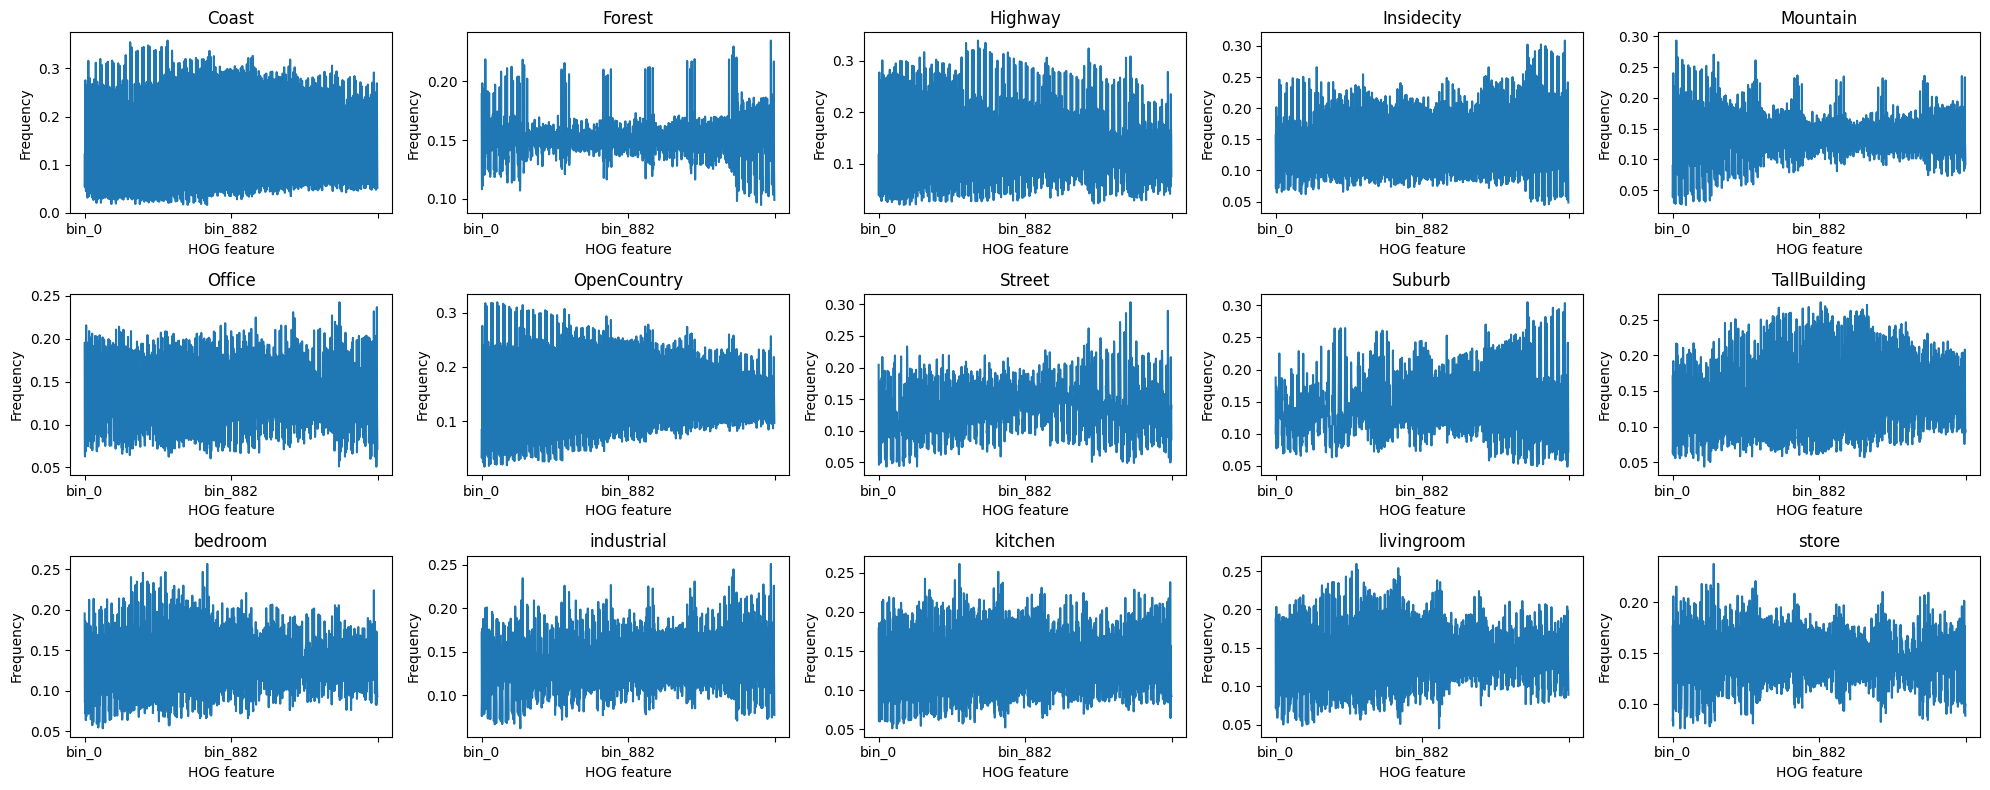

In [45]:
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    ax.plot(hog_mean.iloc[i, :-1])
    ax.set_title(hog_mean.index[i])
    ax.set_xticks([0, len(hog_mean.columns) // 2, len(hog_mean.columns)])
    ax.set_xlabel("HOG feature")
    ax.set_ylabel("Frequency")

plt.tight_layout()

<Axes: xlabel='img_size_x', ylabel='img_size_y'>

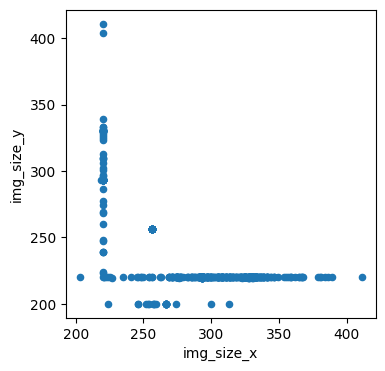

In [46]:
df.plot(kind="scatter", x="img_size_x", y="img_size_y", figsize=(4, 4))

array([[<Axes: title={'center': 'img_size_x'}>,
        <Axes: title={'center': 'img_size_y'}>]], dtype=object)

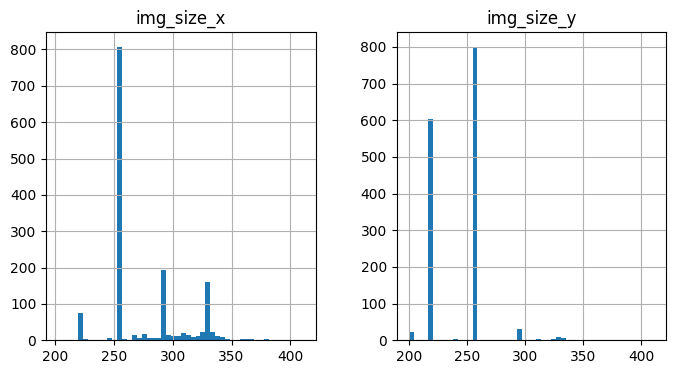

In [47]:
df.hist(bins=50, figsize=(8, 4))

In [48]:
ROLL_WIN = len(df) // 10
ROLL_WIN

150

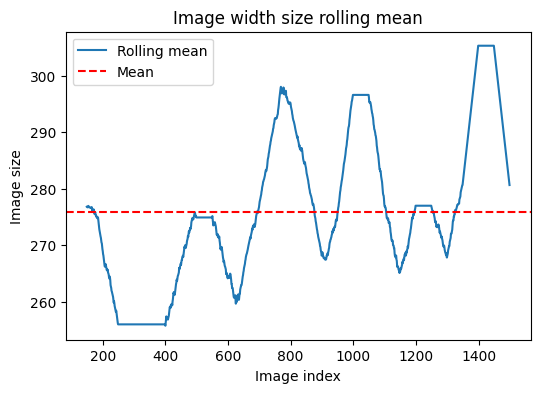

In [49]:
# Plot the rolling mean of the image size with the mean
df["img_size_x"].rolling(ROLL_WIN).mean().plot(figsize=(6, 4))
plt.axhline(df["img_size_x"].mean(), color="r", linestyle="--")
plt.title("Image width size rolling mean")
plt.ylabel("Image size")
plt.xlabel("Image index")
plt.legend(["Rolling mean", "Mean"])

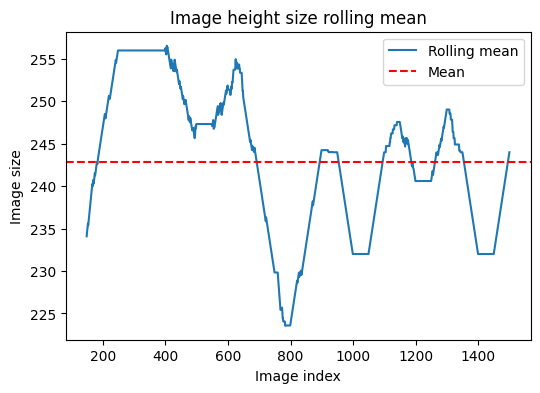

In [50]:
df["img_size_y"].rolling(ROLL_WIN).mean().plot(figsize=(6, 4))
plt.axhline(df["img_size_y"].mean(), color="r", linestyle="--")
plt.title("Image height size rolling mean")
plt.ylabel("Image size")
plt.xlabel("Image index")
plt.legend(["Rolling mean", "Mean"])

Text(0.5, 0, 'Label')

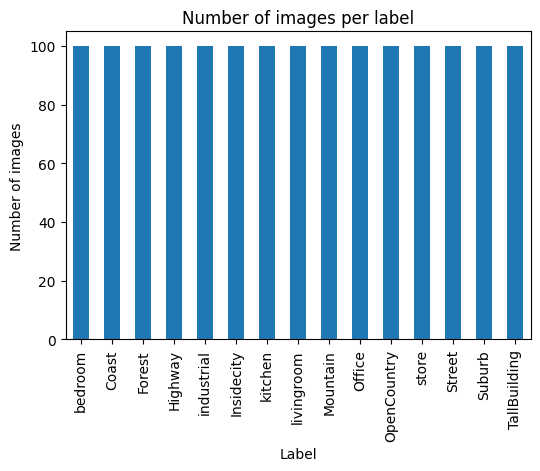

In [51]:
df["label"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("Number of images per label")
plt.ylabel("Number of images")
plt.xlabel("Label")

<Axes: xlabel='label'>

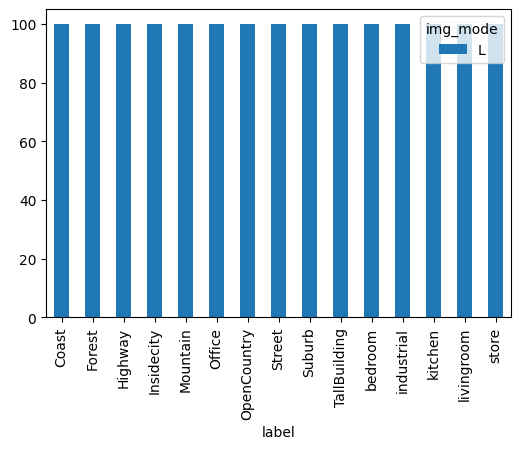

In [54]:
df.groupby("label")["img_mode"].value_counts().unstack().plot(kind="bar", figsize=(6, 4))